# Frequency Calibration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.odr import Model
from scipy.odr import RealData
from scipy.odr import ODR

In [2]:
# Errors:

# Error for DAQ's DAC:

DACRes = 5 / 2**(12)
AbsoluteAccuracyofDAC = 7e-3 # In normal working conditions.
DACError = DACRes + (7e-3)
print(DACError)

# Resolution on the DAQ's ADC:

VoltageRange = 10 # As it was specified on the computer to work in this range
BitResolution = 12 # As i was using a NI USB 6008 which only has a 12 bit ADC

Resolution = VoltageRange/2**(BitResolution)

print('This is the smallest change in voltage the ADC can measure:',Resolution)

# This is equivalent to 2.44mV 

# Must add the absolute accuracy of the NI USB as well which accounts for all of the changes or errors in measurements due to Noise and temperature drift of the device.

AbsAccuracy = 4.38 * 10 **(-3) 

OVError = Resolution + AbsAccuracy
print('This is the total error of the Output Voltage measurements including everything:',OVError)

0.008220703125
This is the smallest change in voltage the ADC can measure: 0.00244140625
This is the total error of the Output Voltage measurements including everything: 0.00682140625


In [3]:
# Using ODR to plot the line of best fit:

def LinearApproximation(B, x):
    m, c = B
    return m * x + c

linear = Model(LinearApproximation)

In [4]:
df = np.loadtxt('Data/Voltage_Calibration/Voltage_Calibration')
driverfreq = df[:,0]
inputvol = df[:,1]
# Using ODR to plot the line of best fit:

EstimateofSlope = (driverfreq[16] - driverfreq[15]) / (inputvol[16] - inputvol[15])

mydata = RealData(inputvol, driverfreq, sx=DACError, sy=0.5)

myodr = ODR(mydata, linear, beta0=[EstimateofSlope, 0])

myoutput = myodr.run()

myoutput.pprint()

slope, intercept = myoutput.beta  # Optimal parameters
slope_error, intercept_error = myoutput.sd_beta  # Errors in the parameters

Beta: [63.89482863  0.52674004]
Beta Std Error: [0.0389863  0.10965768]
Beta Covariance: [[ 0.01134449 -0.02883985]
 [-0.02883985  0.08975094]]
Residual Variance: 0.1339797349514651
Inverse Condition #: 0.014953971865220883
Reason(s) for Halting:
  Sum of squares convergence


In [5]:
# Calculating the Error on y to be used in later calculations:

#dydm = x #where x is any input voltage selected 
dydc = 1
dydx = m = myoutput.beta[0]

def sigmay(x):
    return np.sqrt((x * 0.23737295)**2 + (1.00305654)**2 + (myoutput.beta[0] * DACError)**2)

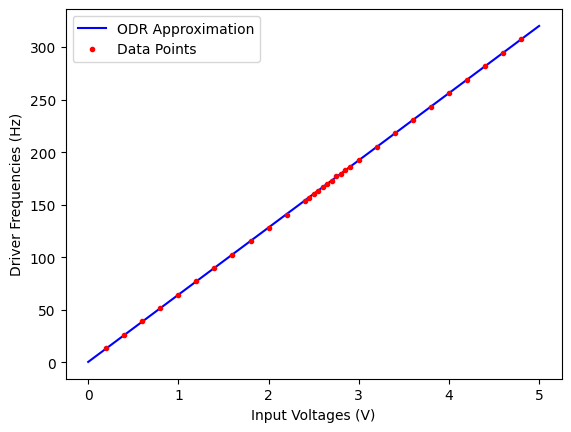

In [6]:
iv_fit = np.linspace(0, 5, 10000)
df_fit = LinearApproximation(myoutput.beta, iv_fit)

plt.plot(iv_fit, df_fit, color='b', label='ODR Approximation')
plt.plot(inputvol, driverfreq, '.', color='r', label='Data Points')
# plt.title('Calibration of the Input Voltage to the Driver Frequency')
plt.xlabel('Input Voltages (V)')
plt.ylabel('Driver Frequencies (Hz)')
plt.legend()
plt.savefig('FreqCalibration.png')
plt.show()

## Brass Frequency Calibration

In [7]:
data30degH2 = np.loadtxt('Data/Brass/30degBrassDataHone2')
iv30degbrass = data30degH2[:,0]
ov30degbrass = data30degH2[:,1]

data60degH2 = np.loadtxt('Data/Brass/60degBrassDataHone2')
iv60degbrass= data60degH2[:,0]
ov60degbrass = data60degH2[:,1]

data90degH2 = np.loadtxt('Data/Brass/90degBrassDataHone2')
iv90degbrass= data90degH2[:,0]
ov90degbrass = data90degH2[:,1]

data120degH2 = np.loadtxt('Data/Brass/120degBrassDataHone2')
iv120degbrass = data120degH2[:,0]
ov120degbrass = data120degH2[:,1]

data150degH2 = np.loadtxt('Data/Brass/150degBrassDataHone2')
iv150degbrass= data150degH2[:,0]
ov150degbrass = data150degH2[:,1]

df30degbrass = []
df60degbrass = []
df90degbrass = []
df120degbrass = []
df150degbrass = []

df30degbrasserr = []
df60degbrasserr = []
df90degbrasserr = []
df120degbrasserr = []
df150degbrasserr = []

for x in iv30degbrass:
    a = sigmay(x)
    df30degbrasserr.append(a)

for x in iv60degbrass:
    a = sigmay(x)
    df60degbrasserr.append(a)

for x in iv90degbrass:
    a = sigmay(x)
    df90degbrasserr.append(a)

for x in iv120degbrass:
    a = sigmay(x)
    df120degbrasserr.append(a)

for x in iv150degbrass:
    a = sigmay(x)
    df150degbrasserr.append(a)

#################################################################

for l in iv30degbrass:
    e = LinearApproximation(myoutput.beta, l)
    df30degbrass.append(e)

for i in iv60degbrass:
    a= LinearApproximation(myoutput.beta, i)
    df60degbrass.append(a)

for j in iv90degbrass:
    b = LinearApproximation(myoutput.beta, j)
    df90degbrass.append(b)

for k in iv120degbrass:
    c = LinearApproximation(myoutput.beta, k)
    df120degbrass.append(c)

for m in iv150degbrass:
    d = LinearApproximation(myoutput.beta, m)
    df150degbrass.append(d)

print(df30degbrass)
print(df60degbrass)
print(df90degbrass)
print(df120degbrass)
print(df150degbrass)

print(df30degbrasserr)
print(df60degbrasserr)
print(df90degbrasserr)
print(df120degbrasserr)
print(df150degbrasserr)

[np.float64(183.42568700399252), np.float64(184.22437236191473), np.float64(185.02305771983694), np.float64(185.82174307775912), np.float64(186.62042843568133), np.float64(187.41911379360351), np.float64(188.21779915152572), np.float64(189.01648450944793)]
[np.float64(173.042777351004), np.float64(176.23751878269272), np.float64(179.43226021438144), np.float64(182.6270016460702), np.float64(185.82174307775892), np.float64(189.01648450944768), np.float64(192.2112259411364), np.float64(195.40596737282513)]
[np.float64(180.5504197154724), np.float64(180.71015678705683), np.float64(180.86989385864126), np.float64(181.02963093022572), np.float64(181.18936800181015), np.float64(181.34910507339458), np.float64(181.508842144979), np.float64(181.66857921656344), np.float64(181.82831628814787), np.float64(181.9880533597323), np.float64(182.14779043131674), np.float64(182.3075275029012), np.float64(182.46726457448563), np.float64(182.62700164607006), np.float64(182.7867387176545), np.float64(182.